In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 14

In [6]:
geiger_data = pd.read_excel('data1.1.4.xlsx')

In [7]:
from math import gamma

def factorial(array):
    return np.array([gamma(val+1) for val in array])

def poisson(n, expected):
    return expected ** n / factorial(n) * np.exp(-expected)

In [8]:
def gaussian(x, expected, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x-expected)/sigma) ** 2)


def sig(x):
    x_sr = np.mean(x)
    s = 0
    for i in x:
        s += (x_sr - i) ** 2
    return (s / (len(x) - 1)) ** 0.5

In [9]:
np_data = np.array(geiger_data['Exp_data'])

reshaped_data = np.reshape(np_data, (-1, 10))
sum_data10 = np.sum(reshaped_data, 1)

reshaped_data = np.reshape(np_data, (-1, 20))
sum_data20 = np.sum(reshaped_data, 1)

reshaped_data = np.reshape(np_data, (-1, 40))
sum_data40 = np.sum(reshaped_data, 1)

reshaped_data = np.reshape(np_data, (-1, 80))
sum_data80 = np.sum(reshaped_data, 1)

In [10]:
x_values = np.arange(0, 50, 0.1)
y_pus10 = poisson(x_values, np.mean(sum_data10))
y_pus20 = poisson(x_values, np.mean(sum_data20))
y_pus40 = poisson(x_values, np.mean(sum_data40))
y_gaus10 = gaussian(x_values, np.mean(sum_data10), sig(sum_data10))
y_gaus20 = gaussian(x_values, np.mean(sum_data20), sig(sum_data20))
y_gaus40 = gaussian(x_values, np.mean(sum_data40), sig(sum_data40))

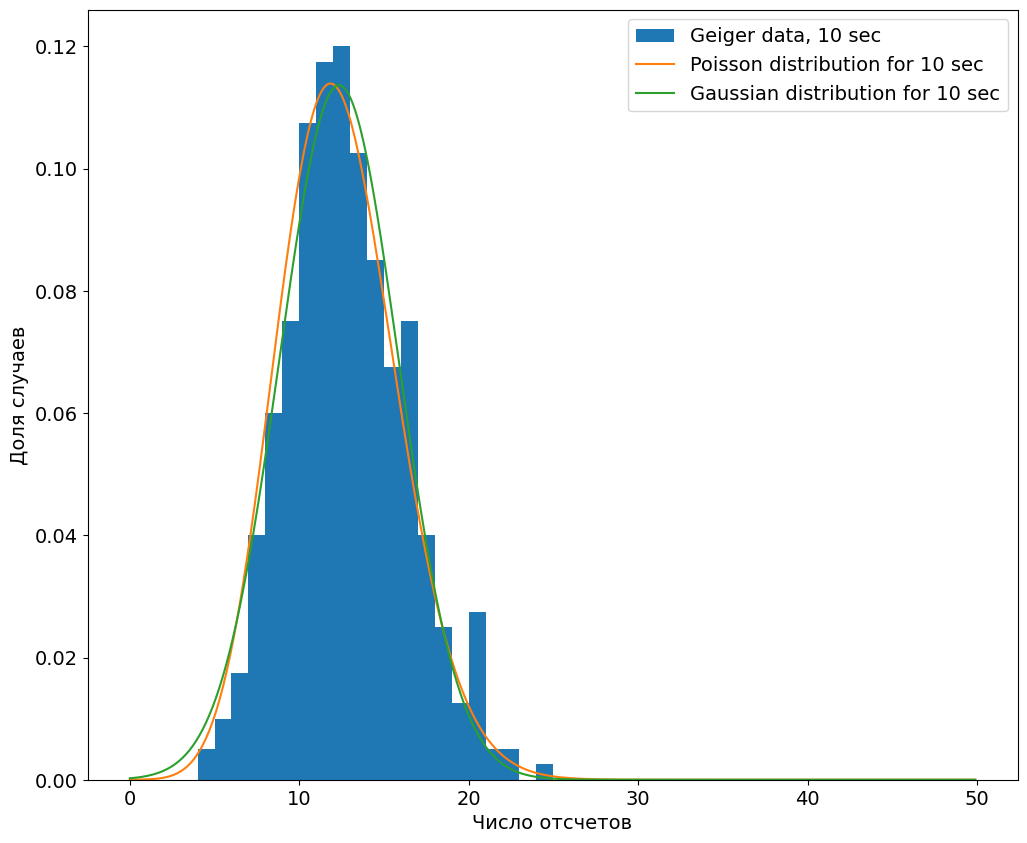

In [11]:
plt.hist(sum_data10, bins=range(0, 50, 1), label='Geiger data, 10 sec', density=True)

plt.plot(x_values, y_pus10, label='Poisson distribution for 10 sec')
plt.plot(x_values, y_gaus10, label='Gaussian distribution for 10 sec')

plt.xlabel('Число отсчетов')
plt.ylabel('Доля случаев')

plt.legend()

plt.show()

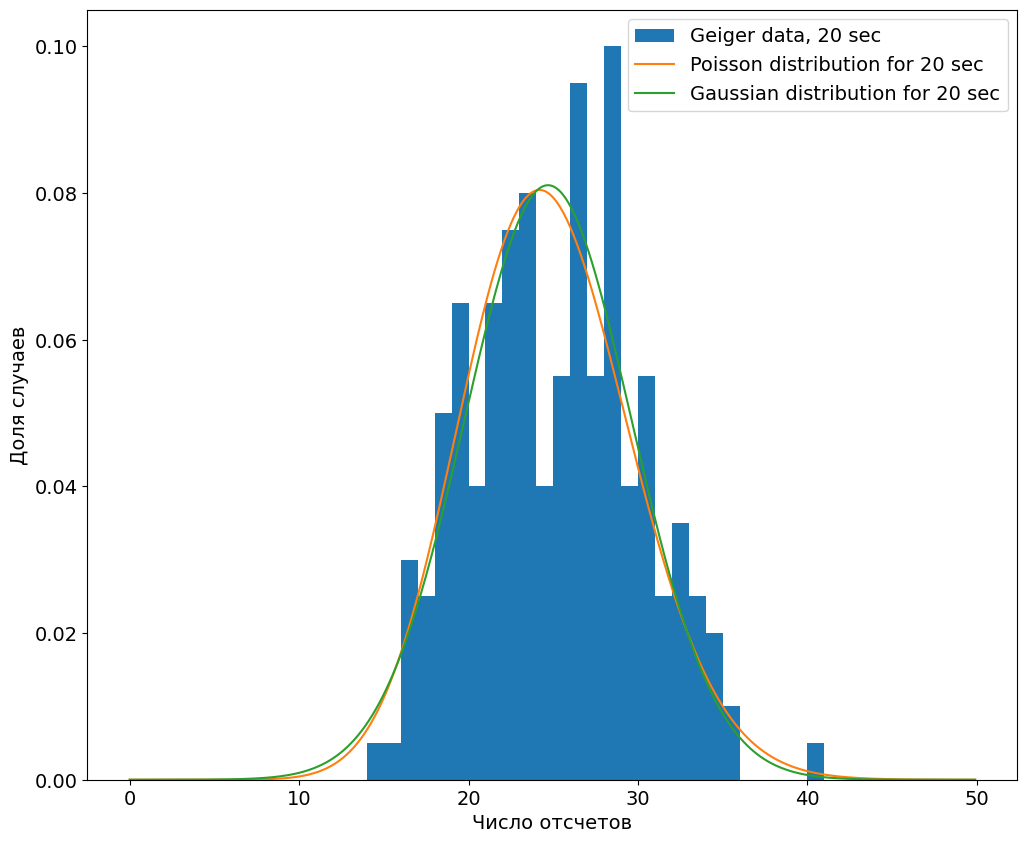

In [12]:
plt.hist(sum_data20, bins=range(0, 50, 1), label='Geiger data, 20 sec', density=True)

plt.plot(x_values, y_pus20, label='Poisson distribution for 20 sec')
plt.plot(x_values, y_gaus20, label='Gaussian distribution for 20 sec')

plt.xlabel('Число отсчетов')
plt.ylabel('Доля случаев')

plt.legend()

plt.show()

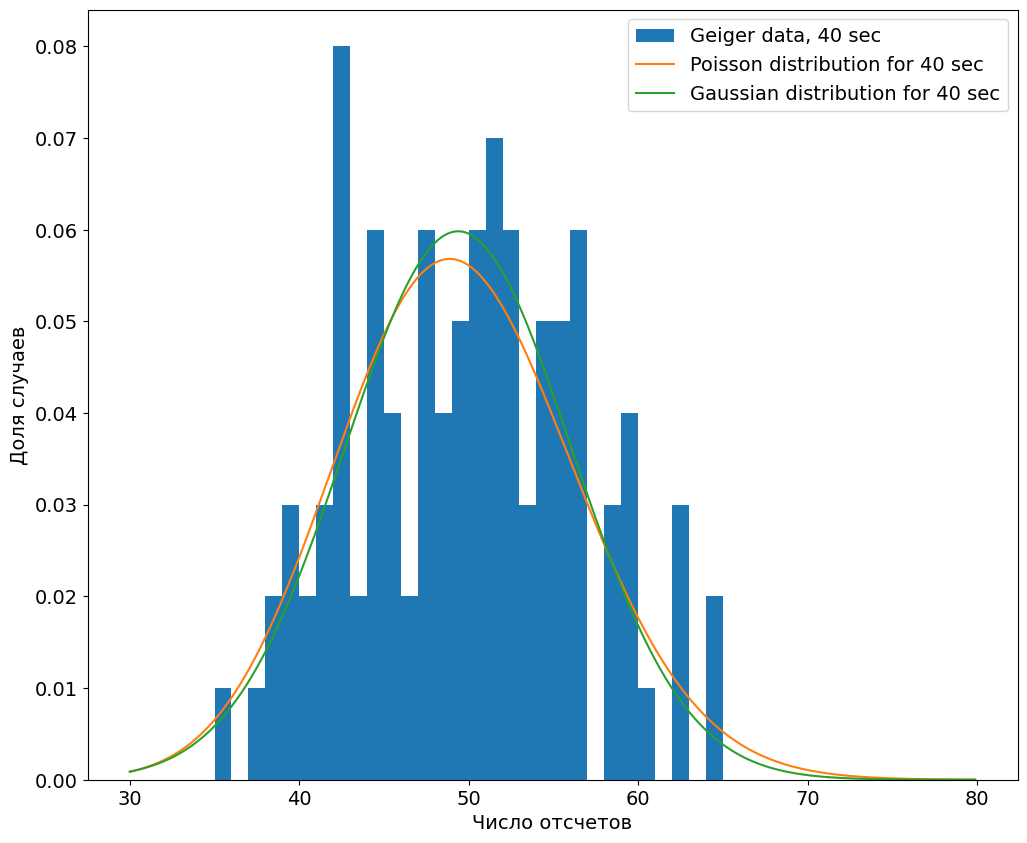

In [34]:
x_values40 = np.arange(30, 80, 0.1)
y_pus40 = poisson(x_values40, np.mean(sum_data40))
y_gaus40 = gaussian(x_values40, np.mean(sum_data40), sig(sum_data40))

plt.hist(sum_data40, bins=range(30, 80, 1), label='Geiger data, 40 sec', density=True)

plt.plot(x_values40, y_pus40, label='Poisson distribution for 40 sec')
plt.plot(x_values40, y_gaus40, label='Gaussian distribution for 40 sec')

plt.xlabel('Число отсчетов')
plt.ylabel('Доля случаев')

plt.legend()

plt.show()

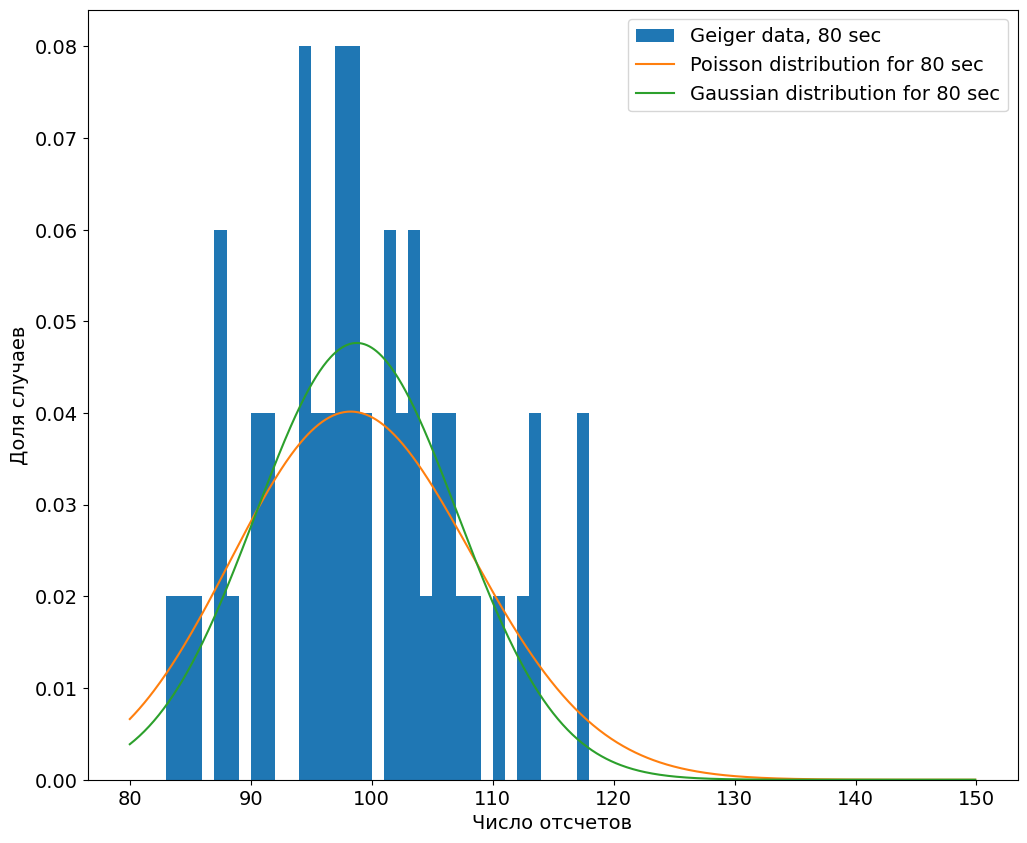

In [19]:
x_values80 = np.arange(80, 150, 0.1)
y_pus80 = poisson(x_values80, np.mean(sum_data80))
y_gaus80 = gaussian(x_values80, np.mean(sum_data80), sig(sum_data80))


plt.hist(sum_data80, bins=range(80, 150, 1), label='Geiger data, 80 sec', density=True)

plt.plot(x_values80, y_pus80, label='Poisson distribution for 80 sec')
plt.plot(x_values80, y_gaus80, label='Gaussian distribution for 80 sec')

plt.xlabel('Число отсчетов')
plt.ylabel('Доля случаев')

plt.legend()

plt.show()

In [38]:
def rasp(x):
    sigma = sig(x)
    sr = np.mean(x)
    c_1 = 0
    c_2 = 0
    c_3 = 0
    for i in x:
        if sr + sigma > i > sr - sigma:
            c_1 += 1
        if sr + 2 * sigma > i > sr - 2 * sigma:
            c_2 += 1
        if sr + 3 * sigma > i > sr - 3 * sigma:
            c_3 += 1
    n = len(x)
    return(c_1 / n * 100, c_2 / n * 100, c_3 / n * 100)

In [35]:
print(rasp(sum_data10), "нормальное распределение для 10с")
print(rasp(sum_data20), "нормальное распределение для 20с")
print(rasp(sum_data40), "нормальное распределение для 40с")
print(rasp(sum_data80), "нормальное распределение для 80с")

(67.5, 94.5, 99.75) нормальное распределение для 10с
(64.5, 98.0, 99.5) нормальное распределение для 20с
(67.0, 97.0, 100.0) нормальное распределение для 40с
(68.0, 96.0, 100.0) нормальное распределение для 80с


In [42]:
sigma10f = sig(sum_data10)
sigma20f = sig(sum_data20)
sigma40f = sig(sum_data40)
sigma80f = sig(sum_data80)

sigma10s = (np.mean(sum_data10)) ** 0.5
sigma20s = (np.mean(sum_data20)) ** 0.5
sigma40s = (np.mean(sum_data40)) ** 0.5
sigma80s = (np.mean(sum_data80)) ** 0.5

print(sigma10f, " - по формуле", sigma10s, " - по корню", abs(sigma10f - sigma10s), " - разница -- для 10с")
print(sigma20f, " - по формуле", sigma20s, " - по корню", abs(sigma20f - sigma20s), " - разница -- для 20с")
print(sigma40f, " - по формуле", sigma40s, " - по корню", abs(sigma40f - sigma40s), " - разница -- для 40с")
print(sigma80f, " - по формуле", sigma80s, " - по корню", abs(sigma80f - sigma80s), " - разница -- для 80с")


sr10 = np.mean(sum_data10)
sr20 = np.mean(sum_data20)
sr40 = np.mean(sum_data40)
sr80 = np.mean(sum_data80)
print(sr10, "среднее число отчётов для 10с")
print(sr20, "среднее число отчётов для 20с")
print(sr40, "среднее число отчётов для 40с")
print(sr80, "среднее число отчётов для 80с")

3.5102392295428464  - по формуле 3.513545218152173  - по корню 0.0033059886093265156  - разница -- для 10с
4.9208713531621475  - по формуле 4.968903299521938  - по корню 0.04803194635979047  - разница -- для 20с
6.667848380114985  - по формуле 7.027090436304346  - по корню 0.3592420561893608  - разница -- для 40с
8.372842396457632  - по формуле 9.937806599043876  - по корню 1.5649642025862445  - разница -- для 80с
12.345 среднее число отчётов для 10с
24.69 среднее число отчётов для 20с
49.38 среднее число отчётов для 40с
98.76 среднее число отчётов для 80с


In [44]:
def frequency_list_dict(data):
    freq_dict = {}
    for item in data:
        if item in freq_dict:
            freq_dict[item] += 1
        else:
            freq_dict[item] = 1
    for i in freq_dict.keys():
        freq_dict[i] = freq_dict[i] / len(data)
    return freq_dict

In [46]:
data10 = frequency_list_dict(sum_data10)
data20 = frequency_list_dict(sum_data20)
data40 = frequency_list_dict(sum_data40)
data80 = frequency_list_dict(sum_data80)

In [50]:
def delta(x, yp, yg, yz):
    delta_p = np.zeros(150)
    delta_g = np.zeros(150)
    for i in x:
        if yz.get(i) is None:
            delta_p[i] = yp[i]
            delta_g[i] = yg[i]
        else:
            delta_p[i] = abs(yz[i] - yp[i])
            delta_g[i] = abs(yz[i] - yg[i])
    znac = max(yz.keys()) - min(yz.keys())
    return sum(delta_p) / znac, sum(delta_g) / znac, sig(delta_p[min(yz.keys()):max(yz.keys())]), sig(delta_g[min(yz.keys()):max(yz.keys())])

In [51]:
x_val = np.arange(0, 150)

yp10 = poisson(x_val, np.mean(sum_data10))
yg10 = gaussian(x_val, np.mean(sum_data10), sig(sum_data10))
razp, razg, sigrazp, sigrazg = delta(x_val, yp10, yg10, data10)
print(razp, "средняя разница пуассона", sigrazp, "ошибка разницы пуассона", razg, "средняя разница гауссв", sigrazg, "ошибка разницы гаусса", " -- для 10с")

yp20 = poisson(x_val, np.mean(sum_data20))
yg20 = gaussian(x_val, np.mean(sum_data20), sig(sum_data20))
razp, razg, sigrazp, sigrazg = delta(x_val, yp20, yg20, data20)
print(razp, "средняя разница пуассона", sigrazp, "ошибка разницы пуассона", razg, "средняя разница гауссв", sigrazg, "ошибка разницы гаусса", " -- для 20с")

yp40 = poisson(x_val, np.mean(sum_data40))
yg40 = gaussian(x_val, np.mean(sum_data40), sig(sum_data40))
razp, razg, sigrazp, sigrazg = delta(x_val, yp40, yg40, data40)
print(razp, "средняя разница пуассона", sigrazp, "ошибка разницы пуассона", razg, "средняя разница гауссв", sigrazg, "ошибка разницы гаусса", " -- для 40с")

yp80 = poisson(x_val, np.mean(sum_data80))
yg80 = gaussian(x_val, np.mean(sum_data80), sig(sum_data80))
razp, razg, sigrazp, sigrazg = delta(x_val, yp80, yg80, data80)
print(razp, "средняя разница пуассона", sigrazp, "ошибка разницы пуассона", razg, "средняя разница гауссв", sigrazg, "ошибка разницы гаусса", " -- для 80с")

0.00591317394566697 средняя разница пуассона 0.004402242089954105 ошибка разницы пуассона 0.007997299147551864 средняя разница гауссв 0.00563878137915384 ошибка разницы гаусса  -- для 10с
0.011391767891671994 средняя разница пуассона 0.010862655575100133 ошибка разницы пуассона 0.011929640146346725 средняя разница гауссв 0.010426528860205855 ошибка разницы гаусса  -- для 20с
0.014481437733215629 средняя разница пуассона 0.010288235008627276 ошибка разницы пуассона 0.013958459285999 средняя разница гауссв 0.010996368742978565 ошибка разницы гаусса  -- для 40с
0.019667251864702123 средняя разница пуассона 0.01362787163863464 ошибка разницы пуассона 0.018418406545144598 средняя разница гауссв 0.013160961659600753 ошибка разницы гаусса  -- для 80с
